In [1]:
import json
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import jsonlines


os.chdir("../")

SRC_PATH = ["src"]
for module_path in SRC_PATH:
    if module_path not in sys.path:
        sys.path.append(module_path)

from utils import *

# Experiment 1

## distil_roberta-base

In [4]:
detector = "distil_roberta-base"
training_method = "adapter"
model_code = "16_04_1545"
eval_acc_df_distil_adapter, degrad_loss_df_distil_adapter, training_loss_df_distil_adapter = create_df_from_training_logs(detector, training_method, model_code)

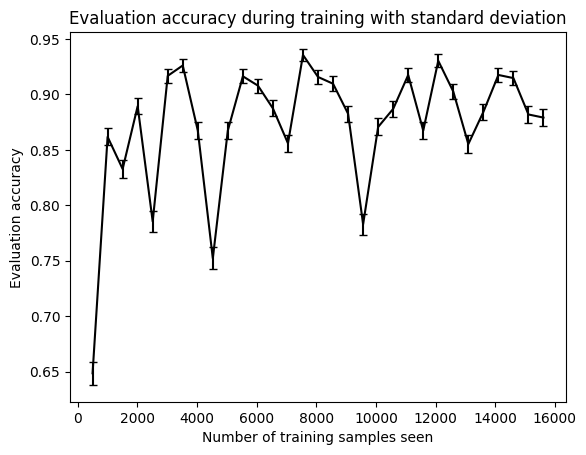

In [5]:
plot_eval_acc_vs_nb_samples(eval_acc_df_distil_adapter)

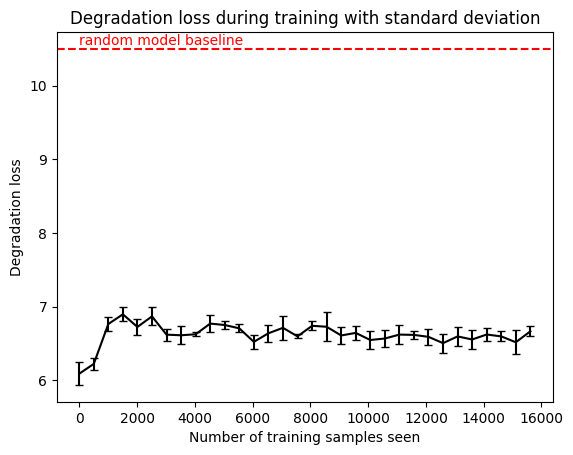

In [13]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_distil_adapter)

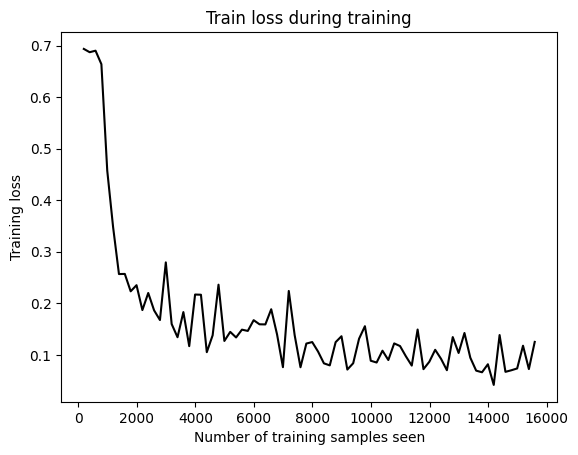

In [14]:
plot_training_loss_vs_nb_samples(training_loss_df_distil_adapter)

In [15]:
detector = "distil_roberta-base"
training_method = "full_finetuning"
model_code = "16_04_1558"
eval_acc_df_distil_full, degrad_loss_df_distil_full, training_loss_df_distil_full = create_df_from_training_logs(detector, training_method, model_code)

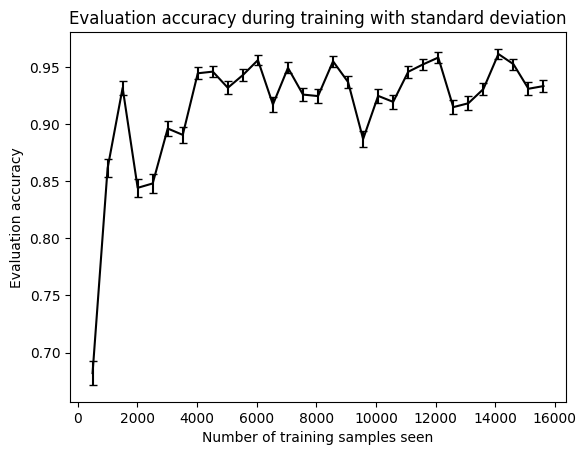

In [16]:
plot_eval_acc_vs_nb_samples(eval_acc_df_distil_full)

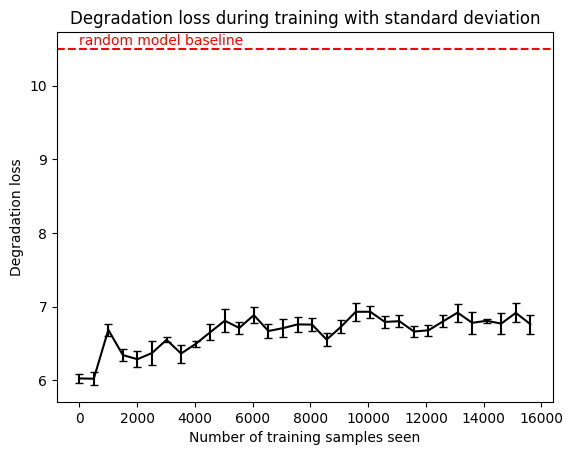

In [17]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_distil_full)

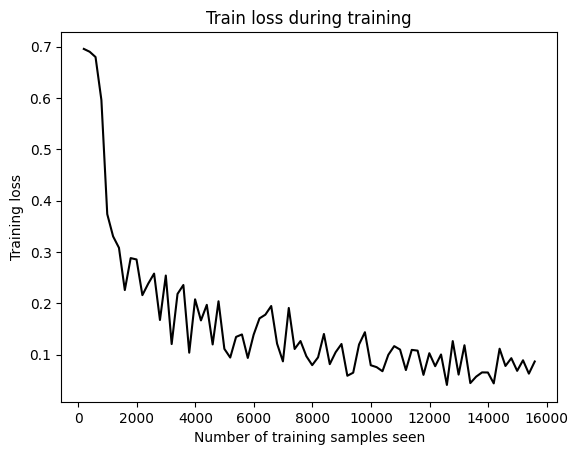

In [18]:
plot_training_loss_vs_nb_samples(training_loss_df_distil_full)

## roberta_large

In [19]:
detector = "roberta_large"
training_method = "adapter"
model_code = "16_04_1602"
eval_acc_df_large_adapter, degrad_loss_df_large_adapter, training_loss_df_large_adapter = create_df_from_training_logs(detector, training_method, model_code)

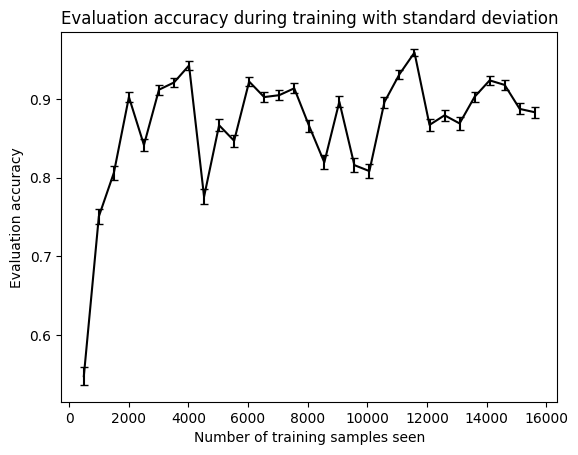

In [20]:
plot_eval_acc_vs_nb_samples(eval_acc_df_large_adapter)

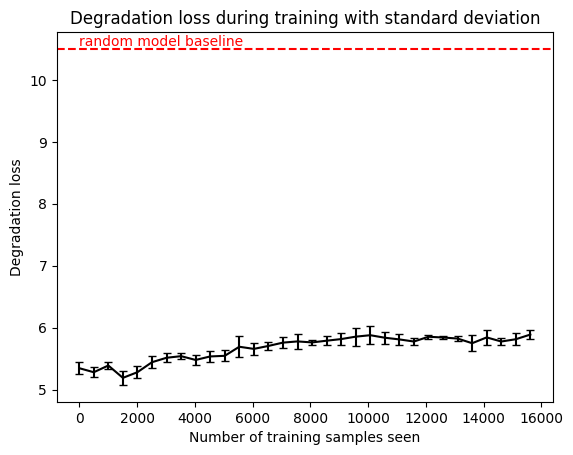

In [21]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_large_adapter)

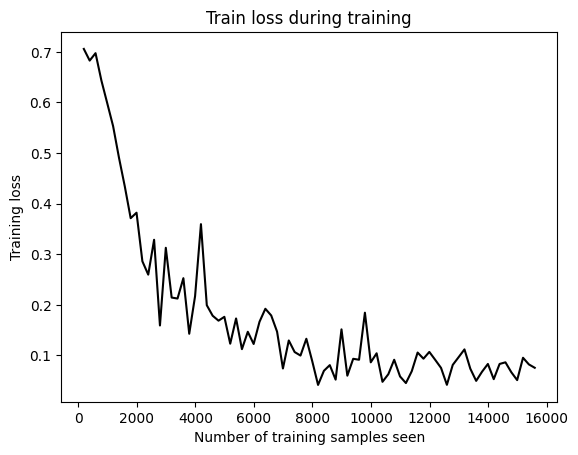

In [22]:
plot_training_loss_vs_nb_samples(training_loss_df_large_adapter)

In [23]:
detector = "roberta_large"
training_method = "full_finetuning"
model_code = "16_04_1648"
eval_acc_df_large_full, degrad_loss_df_large_full, training_loss_df_large_full = create_df_from_training_logs(detector, training_method, model_code)

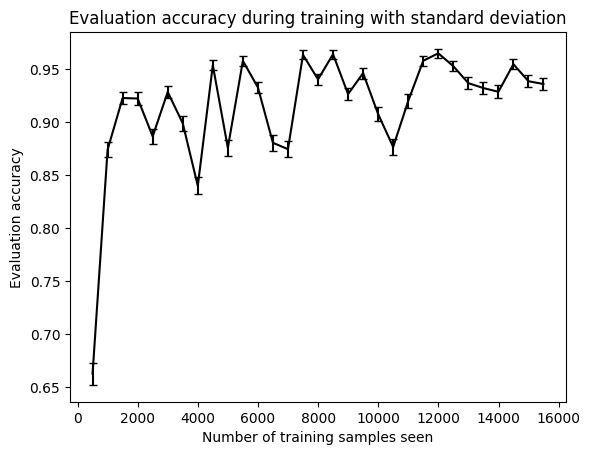

In [24]:
plot_eval_acc_vs_nb_samples(eval_acc_df_large_full)

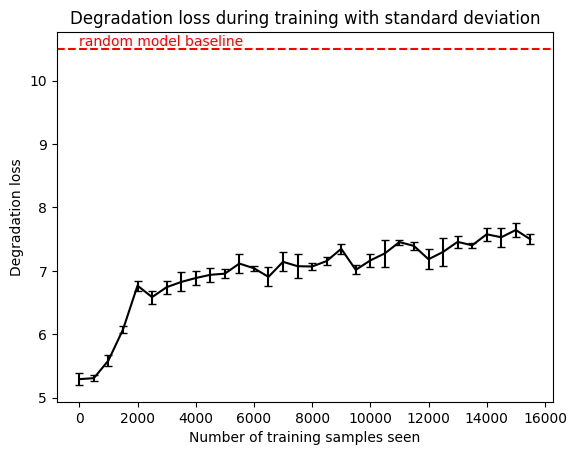

In [25]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_large_full)

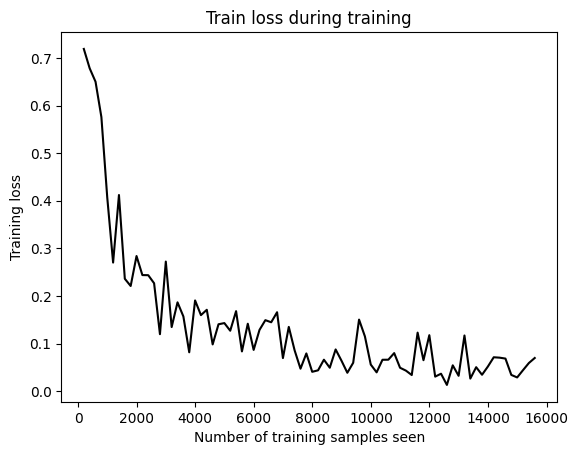

In [26]:
plot_training_loss_vs_nb_samples(training_loss_df_large_full)

## pannel plots

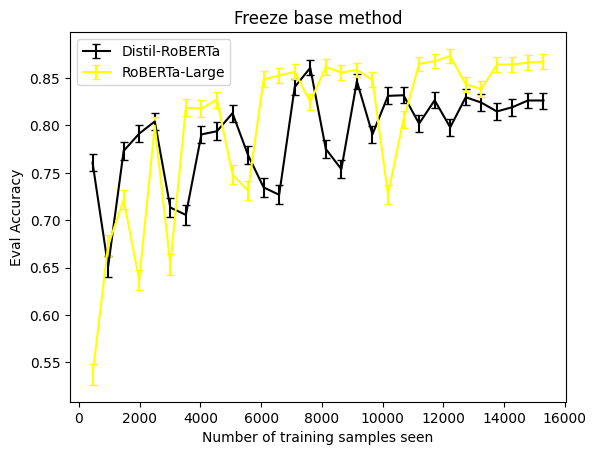

In [27]:
detector = "distil_roberta-base"
training_method = "freeze_base"
model_code = "16_04_1538"
eval_acc_df_distil_freeze_base, degrad_loss_df_distil_freeze_base, training_loss_df_distil_freeze_base = create_df_from_training_logs(detector, training_method, model_code)

detector = "roberta_large"
training_method = "freeze_base"
model_code = "16_04_1539"
eval_acc_df_large_freeze_base, degrad_loss_df_large_freeze_base, training_loss_df_large_freeze_base = create_df_from_training_logs(detector, training_method, model_code)

plot_compared_model_size_eval_acc(eval_acc_df_distil_freeze_base, eval_acc_df_large_freeze_base)

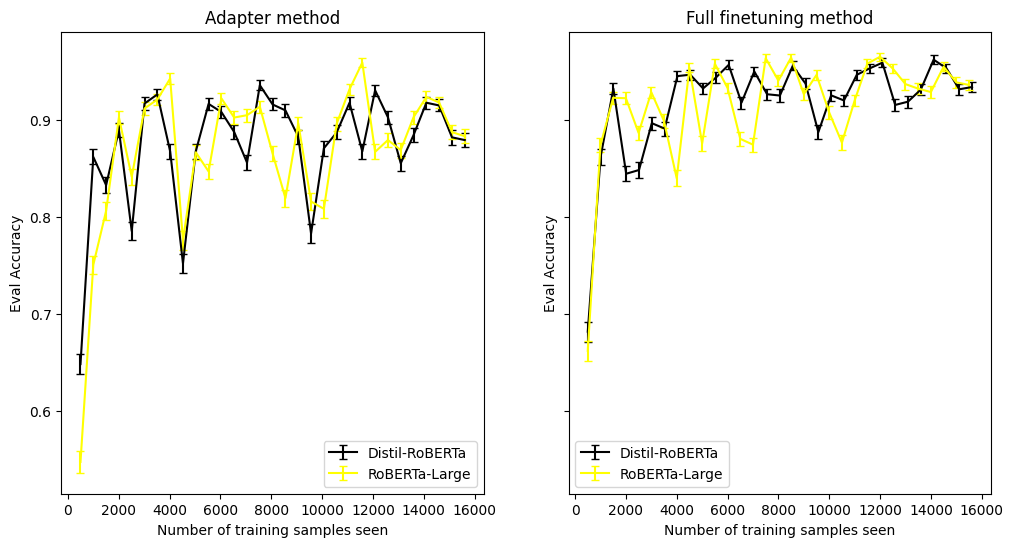

In [28]:
plot_panel_model_and_training_method_eval_acc(eval_acc_df_distil_adapter, eval_acc_df_distil_full, eval_acc_df_large_adapter, eval_acc_df_large_full)

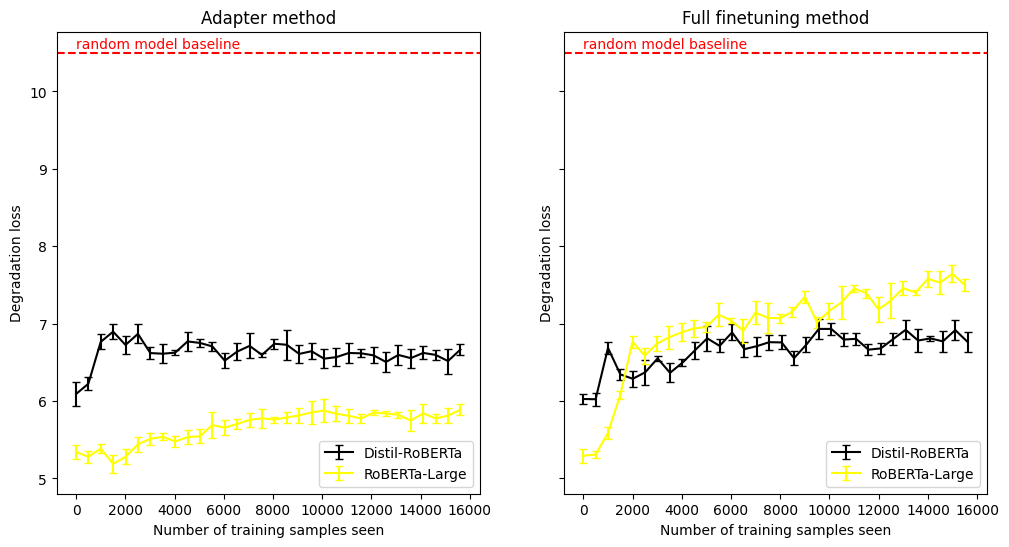

In [29]:
plot_panel_model_and_training_method_degrad(degrad_loss_df_distil_adapter, degrad_loss_df_distil_full, degrad_loss_df_large_adapter, degrad_loss_df_large_full)

# Experiment 2

## freeze base

In [3]:
dataset_names = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr"]

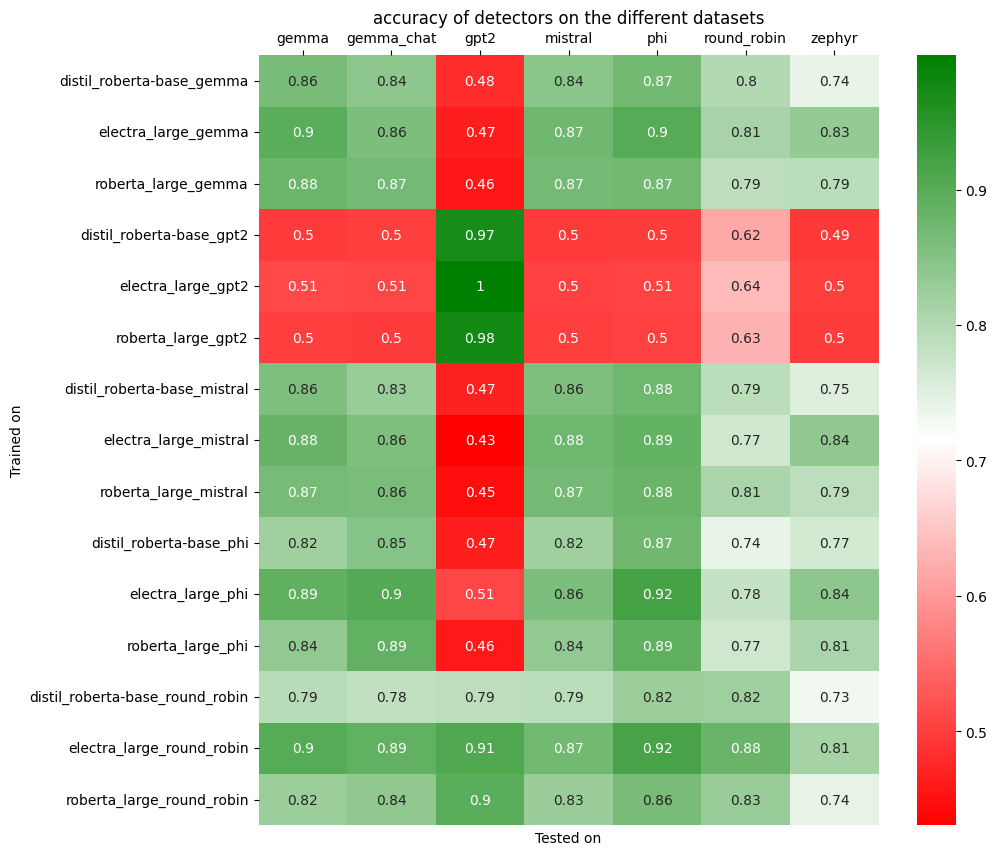

In [4]:
"""
# detector trained on gpt-2 samples
detector_gpt2_results_path = "./outputs_freeze_base/roberta/25_03_1611/test/"

# detector trained on mistral samples
detector_mistral_results_path = "./outputs_full_finetuning/roberta/25_03_1240/test/"
"""


training_method = "freeze_base"
#detectors =["distil_roberta-base"]
trained_on_models = {"distil_roberta-base": {"10_04_1702":"gpt2", "10_04_1706": "phi", "10_04_1710": "gemma", "15_04_1243": "mistral", "15_04_1250": "round_robin"},
                    "roberta_large": {"10_04_1703":"gpt2", "10_04_1723": "phi", "10_04_1742": "gemma", "15_04_1244": "mistral", "15_04_1259": "round_robin"},
                    "electra_large": {"10_04_1814":"gpt2", "10_04_1832": "phi", "10_04_1848": "gemma", "15_04_1245": "mistral", "15_04_1300": "round_robin"}}


dataset_names = ["gpt2", "phi", "gemma", "mistral", "round_robin", "gemma_chat", "zephyr"]


freeze_base_df = create_df_from_test_logs("freeze_base", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy", with_std=False)

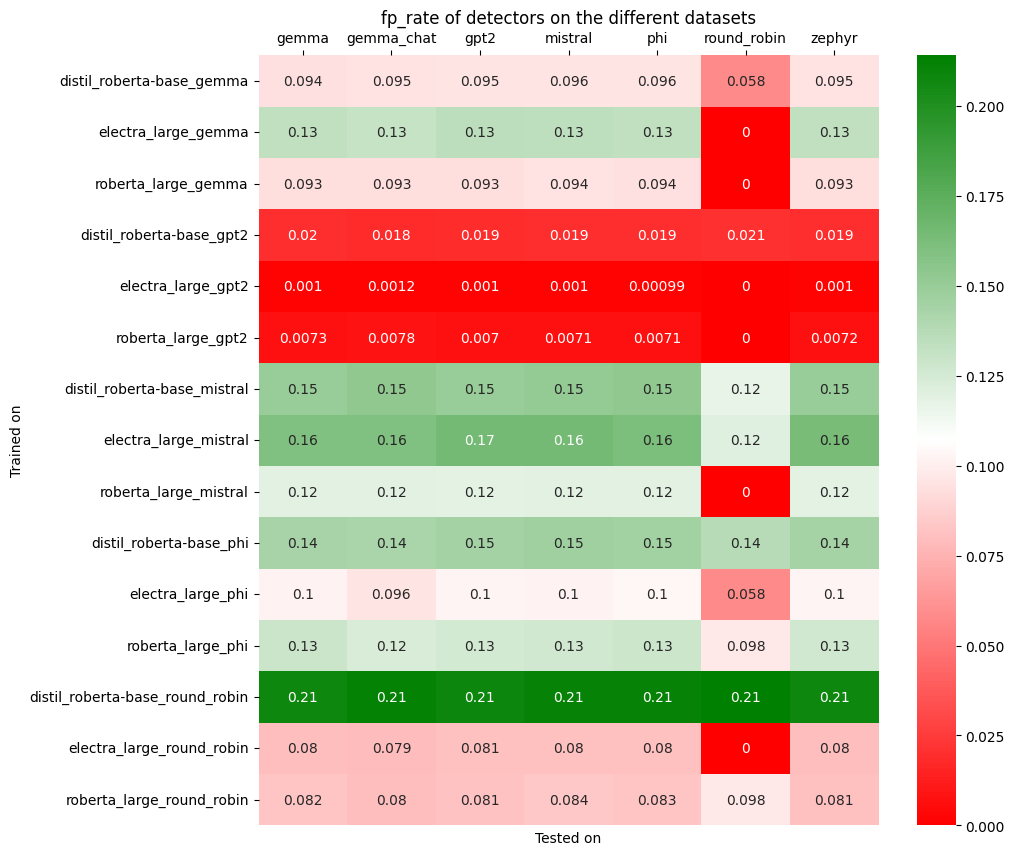

In [5]:
heatmap_from_df(freeze_base_df, "fp_rate", with_std=False)

# Adapter

In [6]:
"""
# detector trained on gpt-2 samples
detector_gpt2_results_path = "./outputs_freeze_base/roberta/25_03_1611/test/"

# detector trained on mistral samples
detector_mistral_results_path = "./outputs_full_finetuning/roberta/25_03_1240/test/"
"""


training_method = "adapter"
#detectors =["distil_roberta-base"]
trained_on_models = {"distil_roberta-base": {"11_04_1434":"gpt2", "11_04_1447": "phi", "11_04_1459": "gemma", "15_04_1254": "mistral", "15_04_1306": "round_robin"},
                    "roberta_large": {"11_04_1843":"gpt2", "11_04_1902": "phi", "11_04_1921": "gemma", "15_04_1349": "mistral", "15_04_1403": "round_robin"},
                    "electra_large": {"10_04_1928":"gpt2", "10_04_1952": "phi", "10_04_2016": "gemma", "15_04_1308": "mistral", "15_04_1332": "round_robin"}}


dataset_names = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr"]


freeze_base_df = create_df_from_test_logs("adapter", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy")

FileNotFoundError: [Errno 2] No such file or directory: './saved_training_logs_experiment_2/roberta_large/adapter/fake_true_dataset_gpt2_10k/11_04_1843/test/test_metrics_fake_true_dataset_gpt2_10k.json'

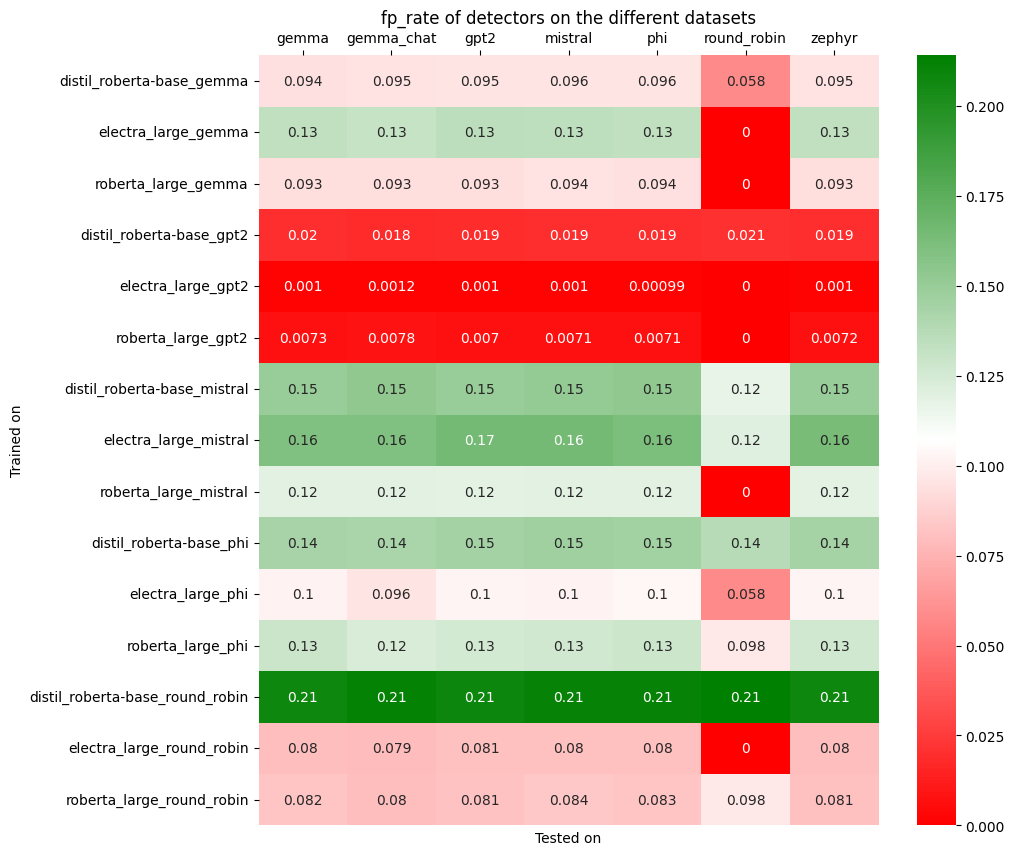

In [7]:
heatmap_from_df(freeze_base_df, "fp_rate")

## full_finetuning

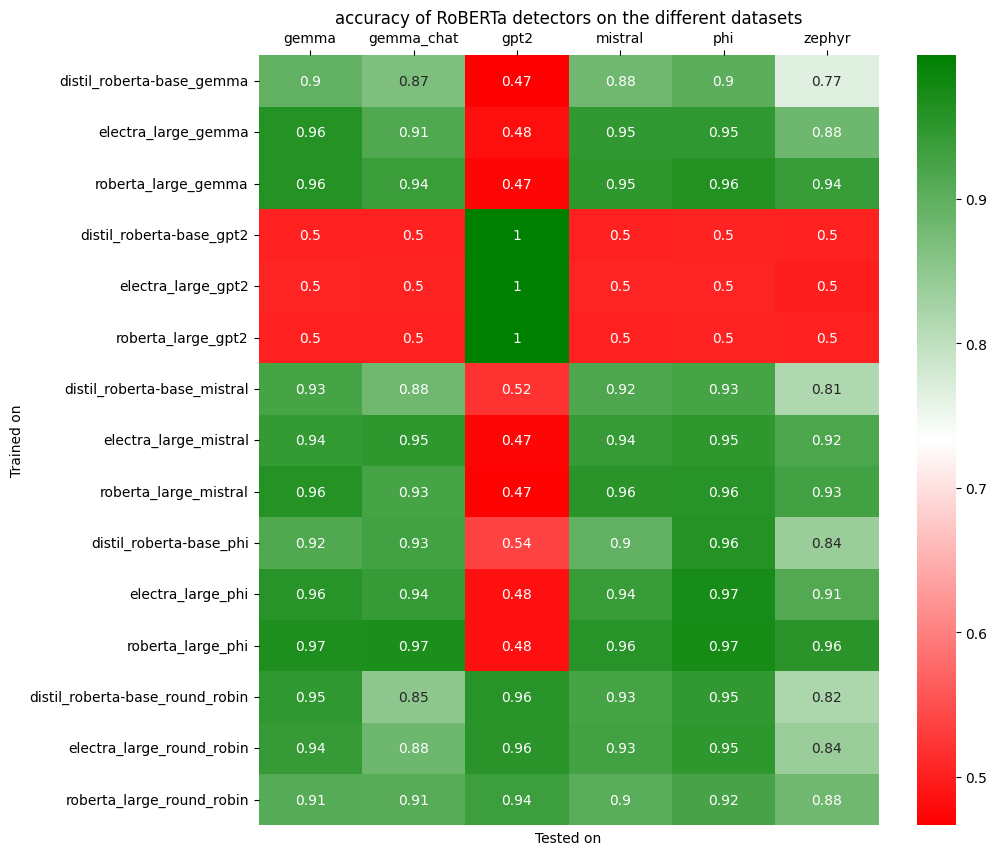

In [6]:
training_method = "full_finetuning"
trained_on_models = {"distil": {"11_04_1532":"gpt2", "11_04_1553": "phi", "11_04_1558": "gemma", "15_04_1314": "mistral", "15_04_1318": "round_robin"},
                    "roberta": {"11_04_1843":"gpt2", "11_04_1902": "phi", "11_04_1921": "gemma", "15_04_1349": "mistral", "15_04_1403": "round_robin"},
                    "electra": {"10_04_2114":"gpt2", "10_04_2125": "phi", "10_04_2137": "gemma", "15_04_1344": "mistral", "15_04_1356": "round_robin"}}


freeze_base_df = create_df_from_test_logs("full_finetuning", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy")

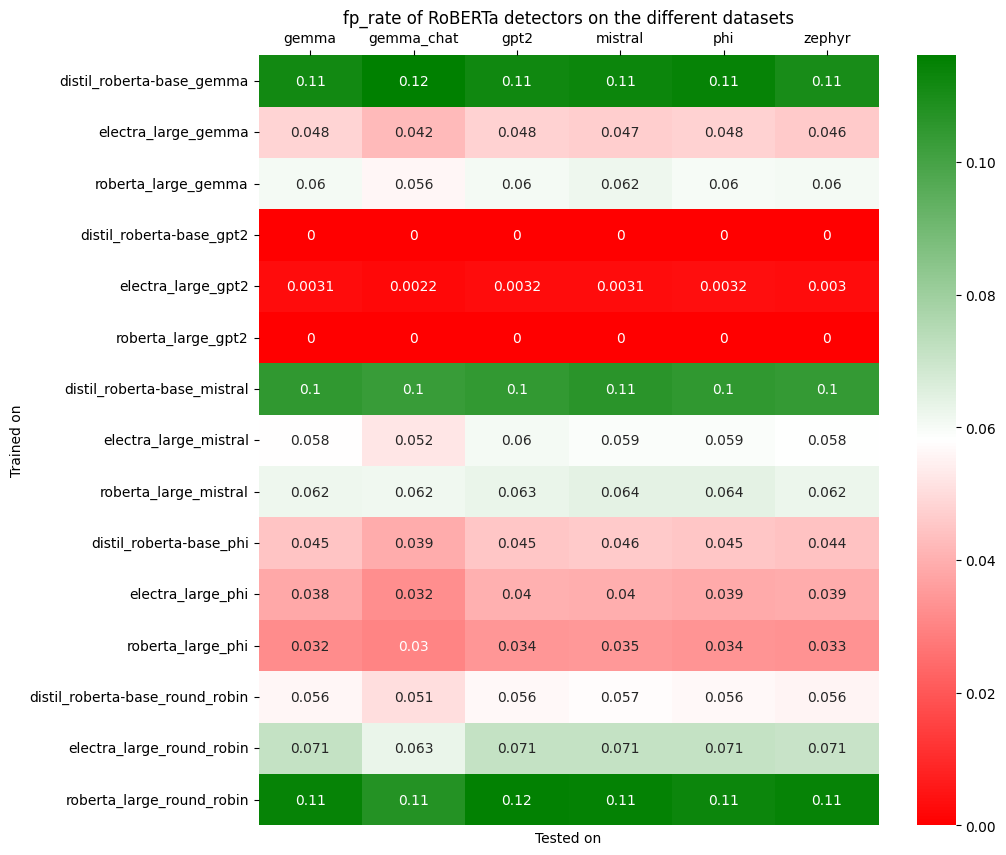

In [7]:
heatmap_from_df(freeze_base_df, "fp_rate")

# Special apostrophes

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

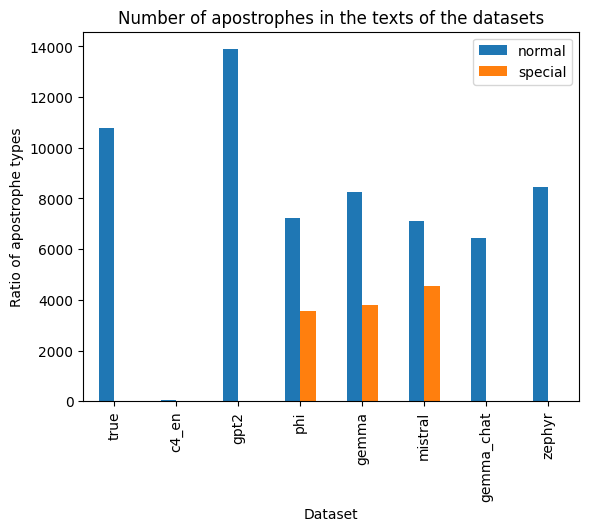

In [8]:
def count_apostrophes_absolute(texts):
    count_apostrophe_type_1 = 0
    count_apostrophe_type_2 = 0

    for text in texts:
        count_apostrophe_type_1 += text.count("'")
        count_apostrophe_type_2 += text.count("’")

    return count_apostrophe_type_1, count_apostrophe_type_2


def count_apostrophes_relative(texts):
    count_apostrophe_type_1 = 0
    count_apostrophe_type_2 = 0

    for text in texts:
        count_apostrophe_type_1 += text.count("'")
        count_apostrophe_type_2 += text.count("’")

    total_apostrophes = count_apostrophe_type_1 + count_apostrophe_type_2

    relative_count_apostrophe_type_1 = count_apostrophe_type_1 / total_apostrophes
    relative_count_apostrophe_type_2 = count_apostrophe_type_2 / total_apostrophes

    return relative_count_apostrophe_type_1, relative_count_apostrophe_type_2


count_apostrophes_dict = {}
true_train_dataset_df = pd.read_json(f"fake_true_datasets/fake_true_dataset_mistral_10k_train.json")
true_texts_df = true_train_dataset_df[true_train_dataset_df["label"] == 0]
count_apostrophe_type_1, count_apostrophe_type_2 = count_apostrophes_absolute(true_texts_df["text"].apply(lambda x: x[0]))
count_apostrophes_dict["true"] = {"normal": count_apostrophe_type_1, "special": count_apostrophe_type_2}

en_dataset = load_dataset("allenai/c4", "en", streaming=True)
sample_size = 100000
en_dataset_sample = en_dataset["train"].shuffle(seed=42).take(sample_size)
en_dataset_sample_df = pd.DataFrame(en_dataset_sample)
count_apostrophe_type_1, count_apostrophe_type_2 = count_apostrophes_absolute(en_dataset_sample_df["text"].apply(lambda x: x[0]))
count_apostrophes_dict["c4_en"] = {"normal": count_apostrophe_type_1, "special": count_apostrophe_type_2}



# load the datasets
datasets = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr"]

for dataset in datasets:
    experiment_name = f"{dataset}_10k"
    fake_train_dataset_df = pd.read_json(f"fake_true_datasets/fake_true_dataset_{experiment_name}_train.json")

    fake_texts_df = fake_train_dataset_df[fake_train_dataset_df["label"] == 1]
    count_apostrophe_type_1, count_apostrophe_type_2 = count_apostrophes_absolute(fake_texts_df["text"].apply(lambda x: x[0]))
    count_apostrophes_dict[dataset] = {"normal": count_apostrophe_type_1, "special": count_apostrophe_type_2}


# plot the results with a bar plot per dataset
count_apostrophes_df = pd.DataFrame(count_apostrophes_dict).T
count_apostrophes_df.plot(kind="bar")
plt.title("Number of apostrophes in the texts of the datasets")
plt.xlabel("Dataset")
plt.ylabel("Ratio of apostrophe types")
plt.show()



In [9]:
count_apostrophes

{'gpt2': {'normal': 13888, 'special': 0},
 'phi': {'normal': 21122, 'special': 3548},
 'gemma': {'normal': 29374, 'special': 7343},
 'mistral': {'normal': 36474, 'special': 11870},
 'gemma_chat': {'normal': 42931, 'special': 11872},
 'zephyr': {'normal': 51375, 'special': 11873}}